In [1]:
from mesa_tricks.io import read_gyre
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = ['Patched.GYRE', 'RG.GYRE', 'HJ.GYRE']

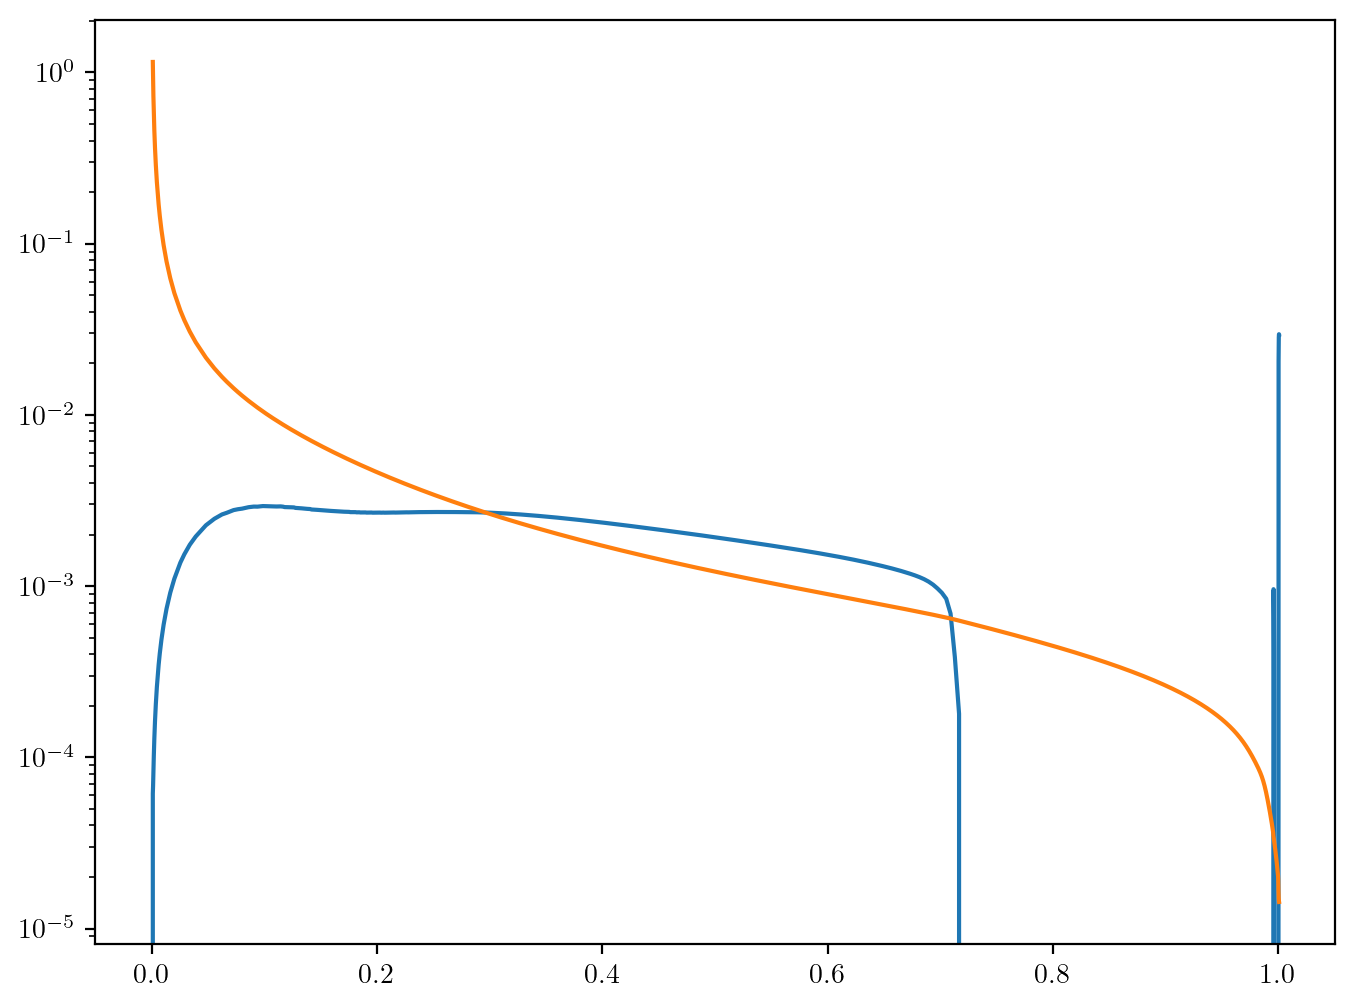

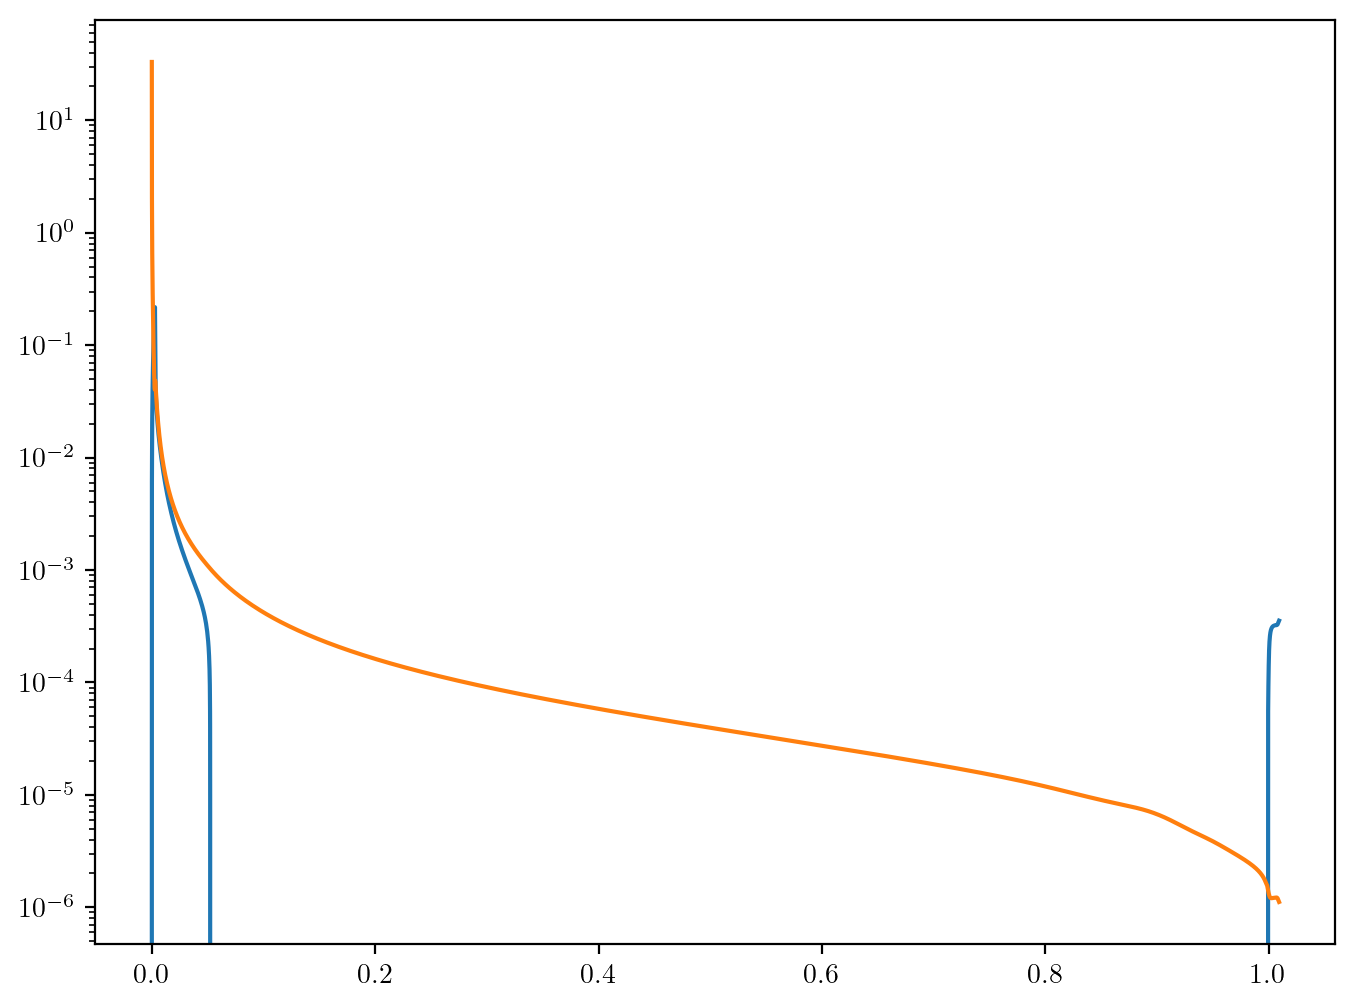

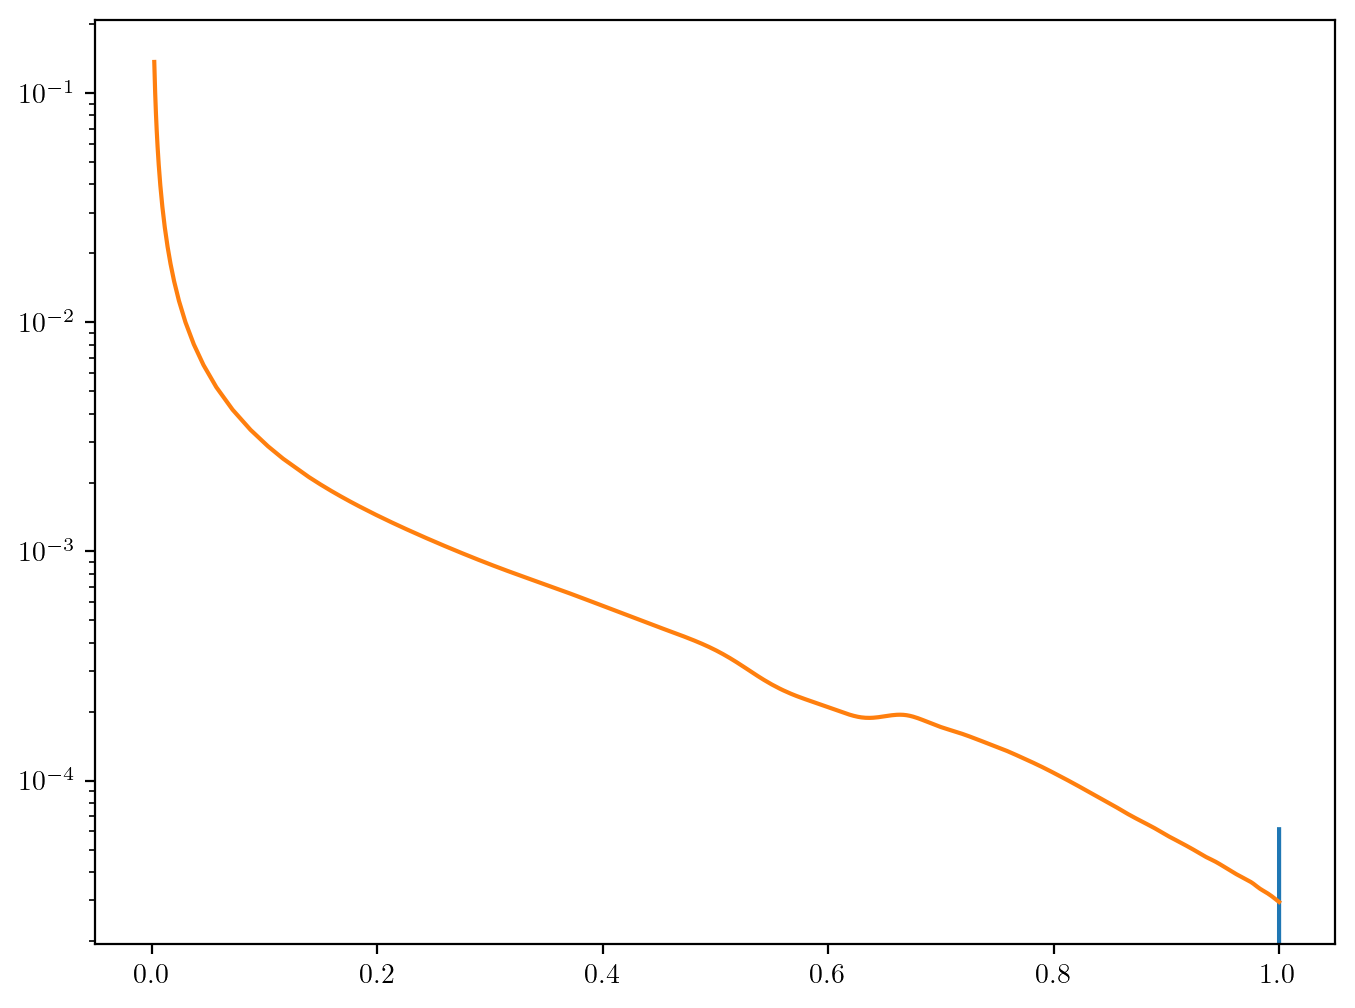

In [11]:
def ssqrt(x):
    return np.sign(x) * np.sqrt(np.abs(x))
for file in files:
    info, gyre = read_gyre(file)
    cs2 = gyre['Γ1'] * gyre['P'] / gyre['ρ']
    S12 = cs2 * 2 / gyre['r']**2
    N2 = gyre['N2']
    x = gyre['r'] / info['R']
    plt.semilogy(x, ssqrt(N2))
    plt.plot(x, ssqrt(S12))
    plt.show()

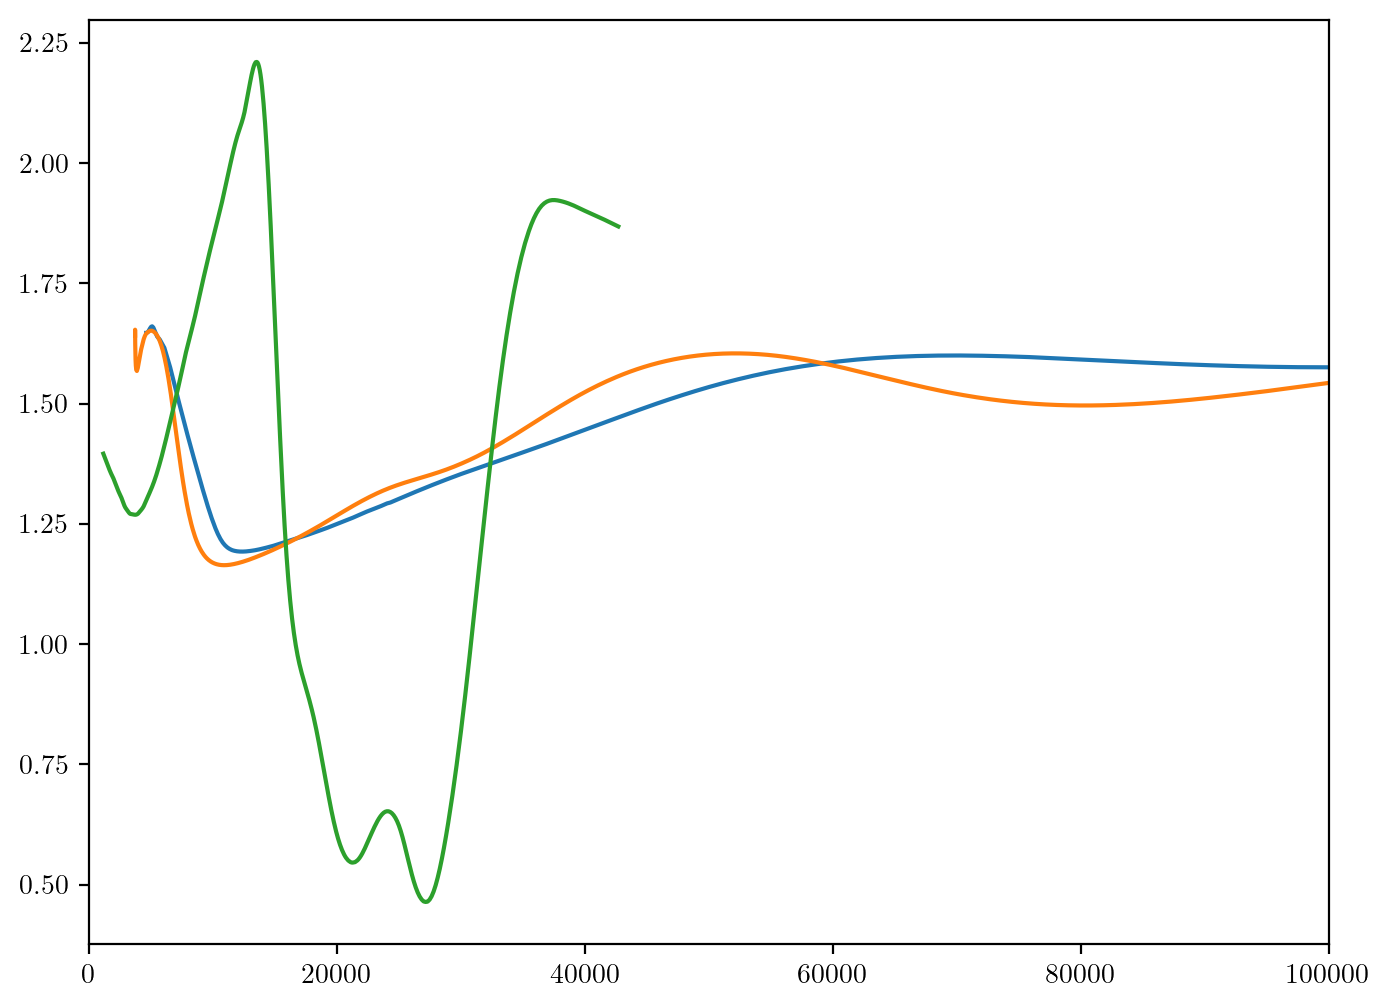

In [21]:
def ssqrt(x):
    return np.sign(x) * np.sqrt(np.abs(x))
for file in files:
    info, gyre = read_gyre(file)
    x = gyre['r'] / info['R']
    plt.plot(gyre['T'], gyre['Γ1'])
    plt.xlim(0, 100000)
plt.show()

In [22]:
gyre.columns

Index(['k', 'r', 'm', 'L', 'P', 'T', 'ρ', '∇', 'N2', 'Γ1', '∇ad', 'δ', 'κ',
       'κκ_T', 'κκ_ρ', 'εnuc', 'εε_T', 'εε_ρ', 'Ω'],
      dtype='object')

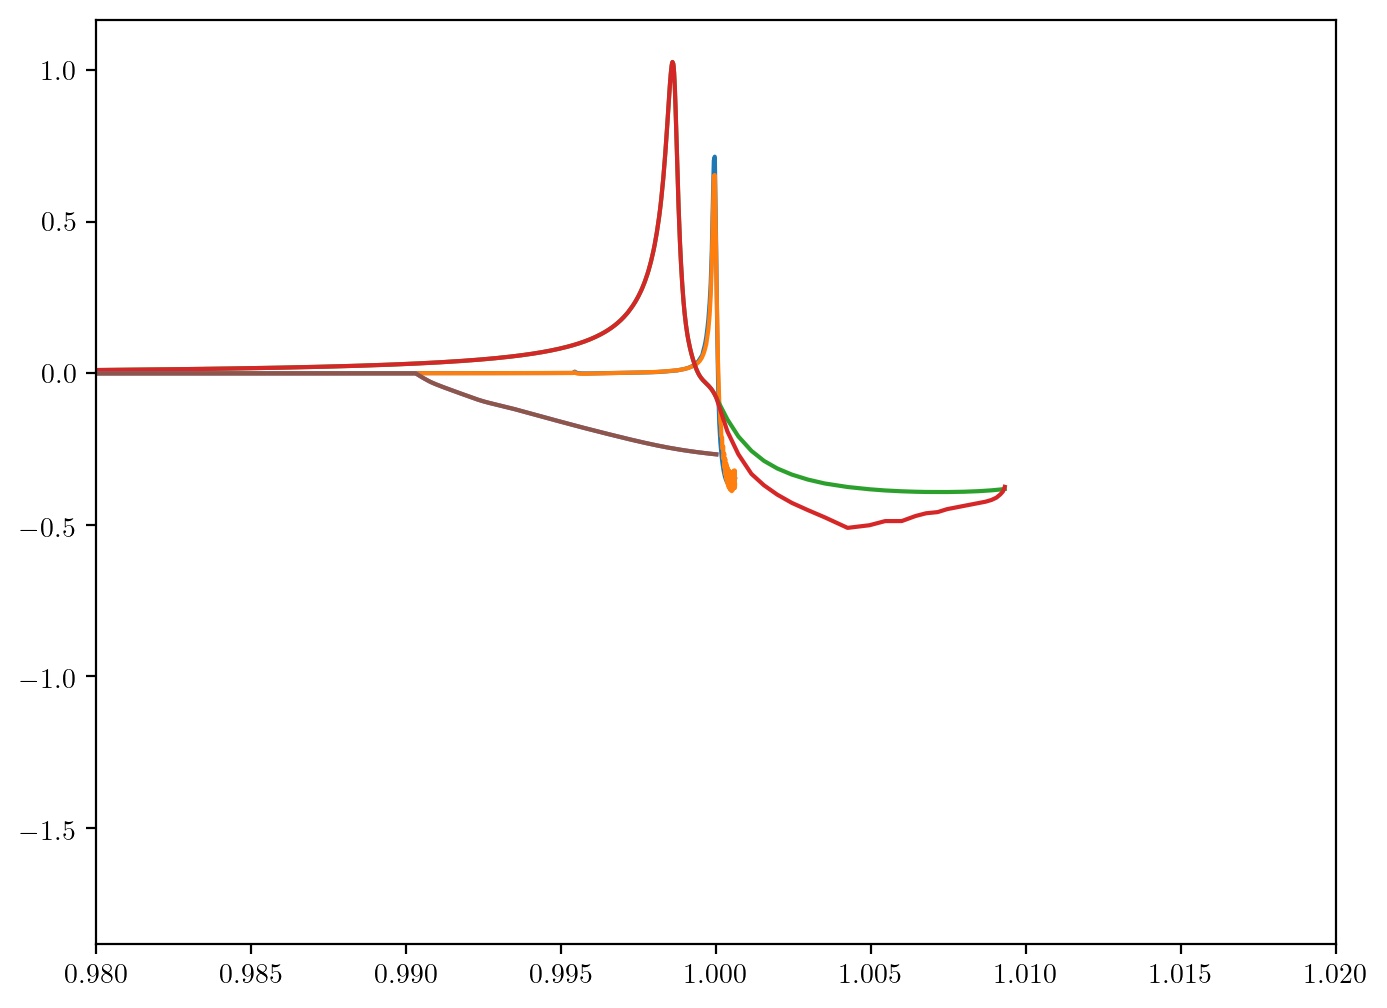

In [29]:
from astropy import units as u, constants as c
for file in files:
    info, gyre = read_gyre(file)
    x = gyre['r'] / info['R']
    g = gyre['m'] / gyre['r']**2 * c.G.cgs.value
    Hp = -gyre['P'] / np.gradient(gyre['P'], gyre['r'])
    plt.plot(x, gyre['∇'] - gyre['∇ad'])
    plt.plot(x, gyre['N2'] * -Hp / g / gyre['δ'])
plt.xlim(1-2e-2, 1+2e-2)
plt.show()